In [1]:
pip list

Package                   Version
------------------------- --------------
anyio                     4.3.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.14.0
beautifulsoup4            4.12.3
bleach                    6.1.0
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
clip                      0.2.0
colorama                  0.4.6
comm                      0.2.2
debugpy                   1.8.1
decorator                 5.1.1
defusedxml                0.7.1
executing                 2.0.1
ez-setup                  0.9
fastjsonschema            2.19.1
fqdn                      1.5.1
ftfy                      6.1.3
h11                       0.14.0
httpcore                  1.0.4
httpx                     0.27.0
idna                      3.6
ipykernel            

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("Fruit_Prices_2020.csv")
df = pd.Series(data['Fruit'])

In [14]:
%matplotlib inline

In [27]:
import matplotlib.pyplot as plt
np.random.randn(50).cumsum()

array([  0.37835115,   2.25788925,   0.43462584,   0.59309168,
         2.05879584,   1.69743779,   2.51205671,   2.53593426,
         3.68107349,   1.73735251,   1.71172648,   0.67961248,
         0.11826229,  -0.45137914,   0.12973613,  -2.39799894,
        -1.85674335,  -1.70419287,  -2.09954607,  -2.08212825,
        -1.77783054,  -3.43395378,  -3.78294835,  -5.3728656 ,
        -5.68386894,  -5.94768075,  -6.83377809,  -5.02773594,
        -7.75792078,  -7.36509624,  -8.32984295,  -9.05828524,
        -8.85859275,  -9.52265215, -10.85473294, -10.18326387,
        -9.51949149,  -8.38355407,  -8.90661596, -10.3531604 ,
        -8.42799216,  -7.86030103,  -8.75293922,  -9.45077812,
        -7.77478803,  -7.74459632,  -7.16490918,  -5.63636469,
        -6.20634611,  -6.11433595])

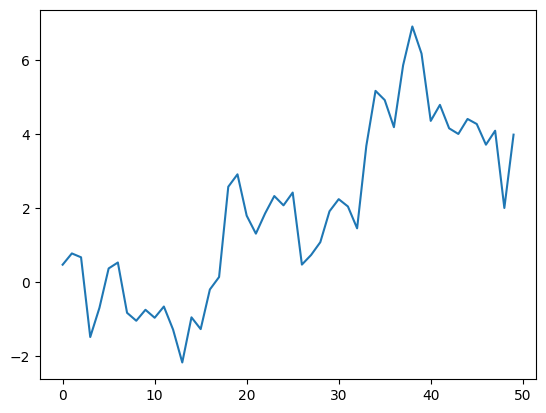

In [28]:
plt.plot(np.random.randn(50).cumsum())